**Implementation of convolutional neural network to predict numbers from number**
**images**

(60000, 28, 28)
(60000,)
(10000,)
(10000, 28, 28)


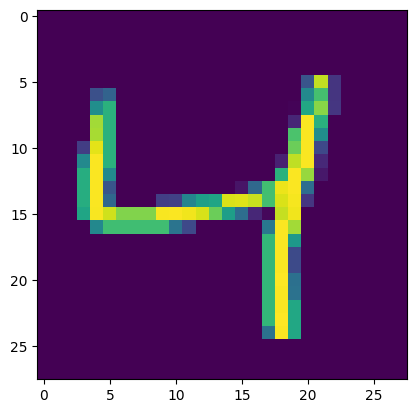

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

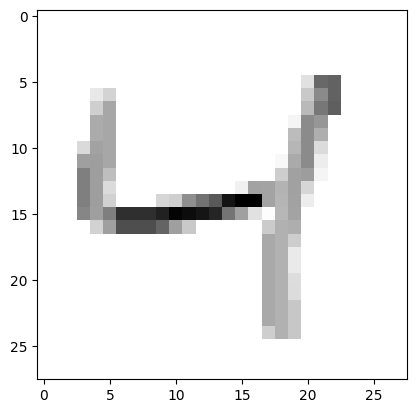

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers  as KL
import tensorflow.keras.models  as KM
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)
print(X_test.shape)

plt.imshow(X_train[2])
plt.show()
plt.imshow(X_train[2], cmap=plt.cm.binary)
print(X_train[2])

X_train = tf.keras.utils.normalize(X_train, axis=1) 
X_test = tf.keras.utils.normalize(X_test, axis=1)
plt.imshow(X_train[2], cmap=plt.cm.binary)
print(X_train[2])

## Model
inputs = KL.Input(shape=(28, 28, 1))
c = KL.Conv2D(32, (3, 3), padding="valid", activation=tf.nn.relu)(inputs)
m = KL.MaxPool2D((2, 2), (2, 2))(c)
d = KL.Dropout(0.5)(m)
c = KL.Conv2D(64, (3, 3), padding="valid", activation=tf.nn.relu)(d)
m = KL.MaxPool2D((2, 2), (2, 2))(c)
d = KL.Dropout(0.5)(m)
c = KL.Conv2D(128, (3, 3), padding="valid", activation=tf.nn.relu)(d)
f = KL.Flatten()(c)
outputs = KL.Dense(10, activation=tf.nn.softmax)(f)
model = KM.Model(inputs, outputs)
model.summary()
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=5)
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss: {0} - Test Acc: {1}".format(test_loss, test_acc))
